# Letters

## Description

Generate an image with the edges of the letters present in this noisy image

## Group ID

Identify your group here, including the number and name of each group's member

In [43]:
import cv2
# to install cv2 use: pip install opencv-python
import matplotlib.pyplot as plt 
import numpy as np

# Main



In [58]:
fname = 'Letters-noisy.png'
operations = {}
pipeline_order = []

In [56]:
# Check list of operations
print(operations)

{'impaint': <function inpaint_image at 0x72304b50c720>, 'dft': <function compute_dft at 0x72304b6aa5c0>, 'notch': <function apply_notch_filter at 0x72304b50d1c0>, 'donut': <function apply_donut_notch_filter at 0x723050c1be20>, 'inversed_notch': <function apply_inversed_notch_filter at 0x72304b50cfe0>}


## Main Function

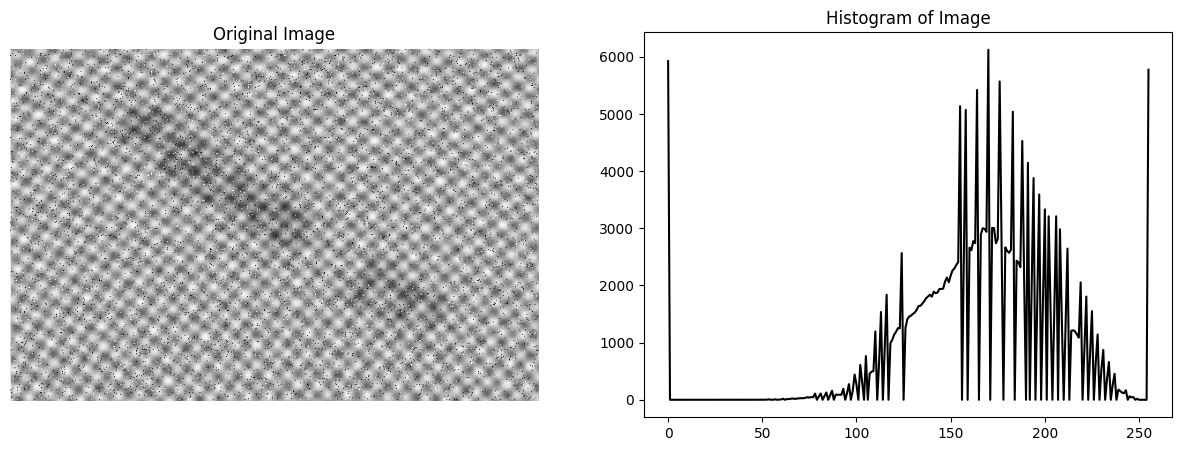

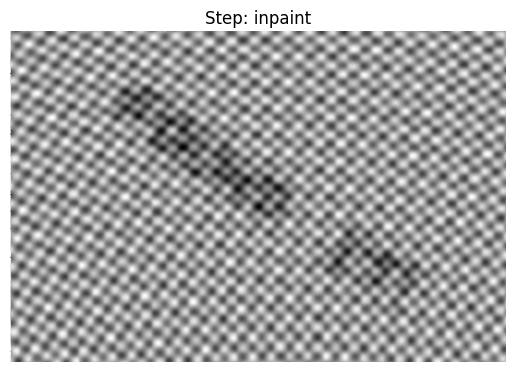

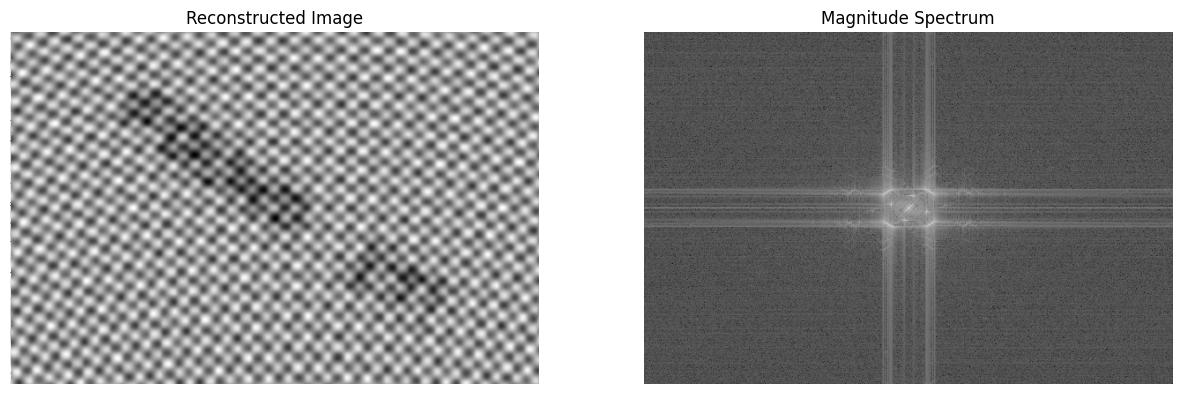

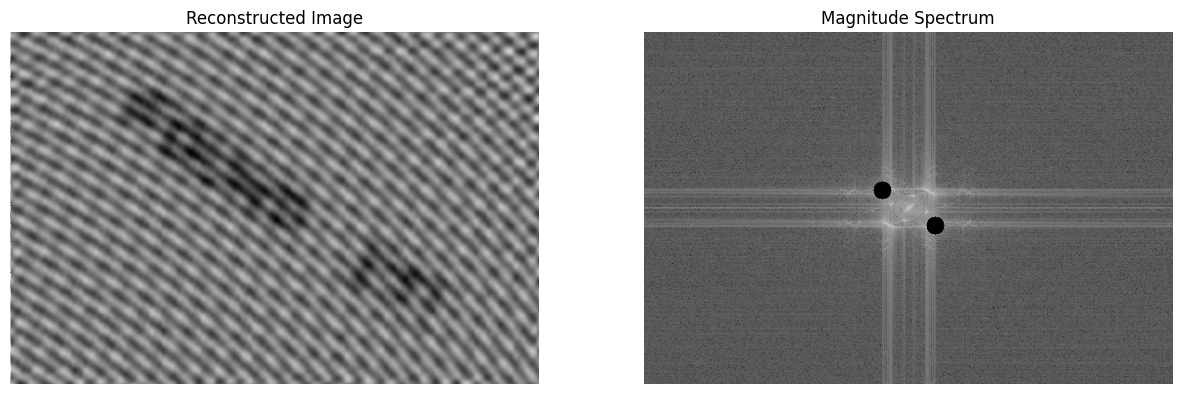

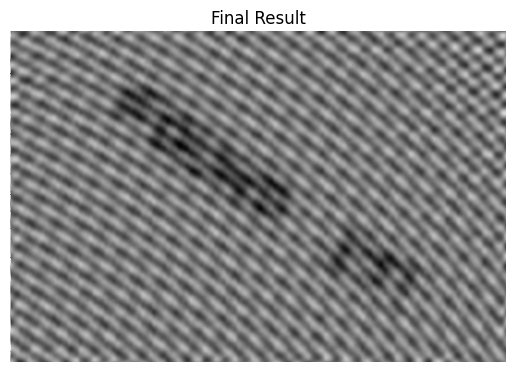

In [75]:
# Execute pipeline
data = load_image(fname)

pipeline_order = ["inpaint", "dft", "notch"]
for step in pipeline_order:
    data = operations[step](data)
    
    plot_result(data, f"Step: {step}")

data = reconstruct_image(data)
plot_result(data, "Final Result")

# Operations

### Inpaint (Black and White)

In [69]:
# Inpainting
def inpaint_image(img):
    mask = (img == 0) | (img == 255)
    mask = mask.astype(np.uint8) * 255
    
    return cv2.inpaint(img, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

operations['inpaint'] = inpaint_image
print(operations)

{'inpaint': <function inpaint_image at 0x723050825800>, 'dft': <function compute_dft at 0x723050c1bec0>, 'notch': <function apply_notch_filter at 0x7230508259e0>, 'donut': <function apply_donut_notch_filter at 0x7230508253a0>, 'inversed_notch': <function apply_inversed_notch_filter at 0x72304b6aa5c0>}


### DTF

In [70]:
def compute_dft(img):
    dft = cv2.dft(img, flags=cv2.DFT_COMPLEX_OUTPUT)
    return np.fft.fftshift(dft)

operations['dft'] = compute_dft
print(operations)

{'inpaint': <function inpaint_image at 0x723050825800>, 'dft': <function compute_dft at 0x7230508256c0>, 'notch': <function apply_notch_filter at 0x7230508259e0>, 'donut': <function apply_donut_notch_filter at 0x7230508253a0>, 'inversed_notch': <function apply_inversed_notch_filter at 0x72304b6aa5c0>}


## Notch Filters

### Regular Notch Filter


In [71]:
# Apply Notch Filter
def apply_notch_filter(dft):
    rows, cols = dft.shape[:2]
    crow, ccol = rows // 2, cols // 2
    
    notch_centers = [(ccol - 30, crow - 20, 10), (ccol + 30, crow + 20, 10)]
    
    mask = np.ones((rows, cols, 2), np.uint8)
    for x, y, r in notch_centers:
        cv2.circle(mask, (x, y), r, (0, 0), -1)
    return dft * mask

operations['notch'] = apply_notch_filter
print(operations)

{'inpaint': <function inpaint_image at 0x723050825800>, 'dft': <function compute_dft at 0x7230508256c0>, 'notch': <function apply_notch_filter at 0x723050825b20>, 'donut': <function apply_donut_notch_filter at 0x7230508253a0>, 'inversed_notch': <function apply_inversed_notch_filter at 0x72304b6aa5c0>}


### Donut Notch Filter


In [72]:
# Apply Donut Notch Filter
def apply_donut_notch_filter(dft):
    rows, cols = dft.shape[:2]
    crow, ccol = rows // 2, cols // 2
    
    notch_centers = [(ccol - 30, crow - 20, 10, 30), (ccol + 30, crow + 20, 10, 30)]
    
    mask = np.ones((rows, cols, 2), np.uint8)
    
    for x, y, r_inner, r_outer in notch_centers:
        cv2.circle(mask, (x, y), r_outer, (0, 0), -1)
        cv2.circle(mask, (x, y), r_inner, (1, 1), -1)
    return dft * mask

operations['donut'] = apply_donut_notch_filter
print(operations)


{'inpaint': <function inpaint_image at 0x723050825800>, 'dft': <function compute_dft at 0x7230508256c0>, 'notch': <function apply_notch_filter at 0x723050825b20>, 'donut': <function apply_donut_notch_filter at 0x723050825c60>, 'inversed_notch': <function apply_inversed_notch_filter at 0x72304b6aa5c0>}


### Inverted Notch Filter

In [73]:

# Apply Inversed Notch Filter
def apply_inversed_notch_filter(dft):
    rows, cols = dft.shape[:2]
    crow, ccol = rows // 2, cols // 2
    
    notch_centers = [(ccol - 30, crow - 20, 10), (ccol + 30, crow + 20, 10)]

    mask = np.zeros((rows, cols, 2), np.uint8)
    for x, y, r in notch_centers:
        cv2.circle(mask, (x, y), r, (1, 1), -1)
    return dft * mask

operations['inversed_notch'] = apply_inversed_notch_filter
print(operations)

{'inpaint': <function inpaint_image at 0x723050825800>, 'dft': <function compute_dft at 0x7230508256c0>, 'notch': <function apply_notch_filter at 0x723050825b20>, 'donut': <function apply_donut_notch_filter at 0x723050825c60>, 'inversed_notch': <function apply_inversed_notch_filter at 0x723050825300>}


## Frequency Filters

# Helper Functions


### Load Image & Analyzing


In [14]:

def analyze_image(img):
    hist = cv2.calcHist([img.astype(np.uint8)], [0], None, [256], [0, 256])
    return hist


def load_image(filename):
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    hist = analyze_image(img)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].imshow(img, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    axes[1].plot(hist, color='black')
    axes[1].set_title('Histogram of Image')
    plt.show()

    return np.float32(img)

### Reconstructing


In [15]:
def reconstruct_image(dft):
    dft = np.fft.ifftshift(dft)
    img_back = cv2.idft(dft)
    return cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

### Plots


In [16]:
def plot_result(data, title):
    if data.ndim == 2:  # Spatial domain
        plt.figure()
        plt.title(title)
        plt.imshow(data, cmap='gray')
        plt.axis('off')
        plt.show()
    elif data.ndim == 3 and data.shape[-1] == 2:  # Frequency domain
        magnitude_spectrum = 20 * np.log(cv2.magnitude(data[:, :, 0], data[:, :, 1]) + 1)
        img = reconstruct_image(data)
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        axes[0].imshow(img, cmap='gray')
        axes[0].set_title('Reconstructed Image')
        axes[0].axis('off')
        
        axes[1].imshow(magnitude_spectrum, cmap='gray')
        axes[1].set_title('Magnitude Spectrum')
        axes[1].axis('off')
        plt.show()